# Final Project: Analyzing Class of 2010 Graduation Data and 2010 AP Tests Results for the City of New York

#### Proposal
Data Source 1: <https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a/data>

Data Source 2: <https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e/data>

I found these data sources from https://opendata.cityofnewyork.us/, where I got my data source for my last project.  I enjoyed doing my last project, and I wanted to continue with education data because I am informed about New York Education, and became even more informed after my last project.  For my last project, I looked at regents exams, so I decided this project I wanted to look at graduation rates and AP test scores.  I also went back to this website because the data is free and legal to download.  Further, data analysis documentation has not been created by someone else.  My first data source has 23 columns, 25.1K rows and is 3.1MB.  My second data source has 5 columns and 258 rows and is 12 KB.  Next, I thought about some aspects of the data that interested me, and that I would like to know more about.  Firstly, I was thinking about how not many schools have students taking AP tests.  I also wanted to look at the average number of exams taken per student and compare it to the graduation rates of those schools.  From these points, I came up with the following questions and hypothesis.

Question 1: Is there a correlation between AP Test taken and graduation rate?

Question 2: Which borough has the most AP testers? Which Borough has the most tests with scores 3, 4, and 5?  Which borough has the highest graduation rate?

Hypothesis 1: Schools with a graduation rate of 95% or higher have at least 5 students taking AP exams.

Hypothesis 2: I believe that schools where students take an average of 2 or more AP exams, the graduation rate is higher, than schools where students take an average of less than 2 exams.  Specifically, I hypothesize that schools who have students averaging 2 or more AP exams have an average graduation rate that is 2% higher than schools who have students averaging less than 2 AP exams.

Hypothesis 3: I believe schools with a higher rate of students scoring 3, 4, and 5 on their exams (these scores are considered “passing”), will have a higher percent of students getting advanced regents diplomas.  I hypothesize that if a school has 50% or higher rate of 3, 4, and 5 scores, then their advanced regents diploma rate will be 30% of the cohort or more.


In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import csv files from url code
grad_url = 'https://data.cityofnewyork.us/api/views/vh2h-md7a/rows.csv?accessType=DOWNLOAD'
grad_columns = ['Demographic','DBN', 'School Name', 'Cohort', 'Total Cohort',
                'Total Grads - n', 'Total Grads - % of cohort','Total Regents - n',
                'Advanced Regents - n','Still Enrolled - n','Dropped Out - n']
ap_url = 'https://data.cityofnewyork.us/api/views/itfs-ms3e/rows.csv?accessType=DOWNLOAD'
ap_df = pd.read_csv(ap_url)
grad_df = pd.read_csv(grad_url, usecols = grad_columns)

##### Data Cleaning
Graduation Data: 
The first thing I did was only pull in columns from the graduation data that would be useful to me.  I am only looking at the class of 2010 so I only want data from the 2006 cohorts, however in the cohort column there is a '2006' and a '2006 Aug'.  After reading the information on the data, I learned that '2006 Aug' is all June and August graduates.  For my research, I only want to look at June graduates so I will only look at the 2006 cohort. I also realized that I only wanted the Demographic, 'Total Cohort', because I want to look at all students in each school.  I realized that multiple columns that I want to be floats are objects because there is an 's' where a NaN should be. I changed the values to NaN and then change the column type to float.  Then I looked at rows where NaN occur and found that there are 27 schools with no values except for the number in the cohort.  I will want to remember this while completing the rest of my calculations. 

AP Data
After looking through the AP data, I realized there is nothing I needed to do to clean the data, it is ready to go!  I checked the column types, the max and min values, and realized that the data is already tidy.

Merging the Dataframes
Both of my dataframes have DBN numbers, which are unique school indentification numbers, so I am going to merge my data on that column.  It is important to remember that an outer join will keep all rows, and inner will only keep rows that have a DBN in both the dataframes.  I used a outer merge because I wanted to keep the data rows from both dataframes.  This way my maximum and minimum values for all my rows remain the same.

In [3]:
#Make the data frame only contain the class of 2010
grad_df = grad_df[(grad_df['Cohort'] == '2006')]

#Make the demographic only 'Total Cohort'
grad_df = grad_df[(grad_df['Demographic'] == 'Total Cohort')]

#replace 's' with nan
grad_df['Total Grads - n'] = grad_df['Total Grads - n'].replace('s', np.NaN)
grad_df['Total Regents - n'] = grad_df['Total Regents - n'].replace('s', np.NaN)
grad_df['Advanced Regents - n'] = grad_df['Advanced Regents - n'].replace('s', np.NaN)
grad_df['Still Enrolled - n'] = grad_df['Still Enrolled - n'].replace('s', np.NaN)
grad_df['Dropped Out - n'] = grad_df['Dropped Out - n'].replace('s', np.NaN)

#Change above columns from object to float
s_cols = ['Total Grads - n', 'Total Regents - n', 'Advanced Regents - n','Still Enrolled - n', 'Dropped Out - n']
grad_df[s_cols] = grad_df[s_cols].apply(pd.to_numeric)

grad_df.reset_index(inplace = True)

grad_df[grad_df.isnull().any(axis=1)]

#grad_df.info()

#Describe AP Data
#ap_df.info()

#Merging the data
df = pd.merge(grad_df, ap_df, how ='outer', on ='DBN') 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 16 columns):
index                                   406 non-null float64
Demographic                             406 non-null object
DBN                                     413 non-null object
School Name                             406 non-null object
Cohort                                  406 non-null object
Total Cohort                            406 non-null float64
Total Grads - n                         379 non-null float64
Total Grads - % of cohort               379 non-null float64
Total Regents - n                       379 non-null float64
Advanced Regents - n                    379 non-null float64
Still Enrolled - n                      379 non-null float64
Dropped Out - n                         379 non-null float64
SchoolName                              258 non-null object
AP Test Takers                          233 non-null float64
Total Exams Taken                       233 no

##### Hypothesis 1:
Schools with a graduation rate of 95% or higher have at least 5 students taking AP exams.

First, I made a bar graph of all the schools graduation rates, and a line at y = 95 just to see about how many schools have a graduation rate of 95%.  Second, I made a graph of the total amount of test takers for all the schools with a graduation rate of 95% or higher. I had a horizontal line at y = 5 in my graph to better see which schools had more than five test takers.


Text(0, 0.5, '% of Cohort Graduating')

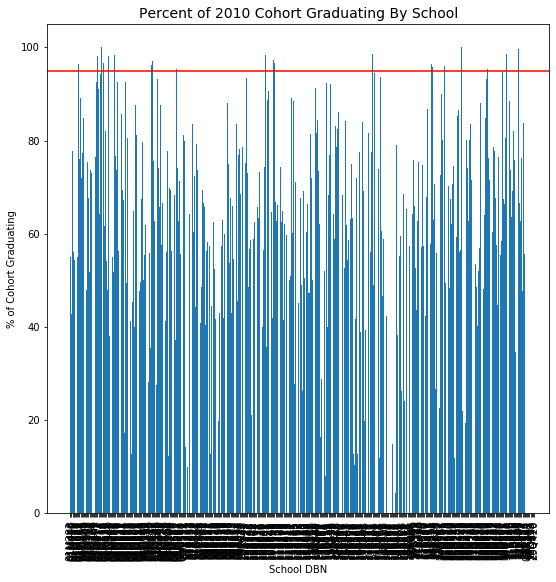

In [4]:
#Graduation Rates of All Schools
plt.figure(figsize=(9,9))
plt.bar(df['DBN'],df['Total Grads - % of cohort'] )
plt.axhline(y=95, color = 'red')
plt.title("Percent of 2010 Cohort Graduating By School", fontsize = 14)
plt.xlabel('School DBN')
plt.xticks(rotation=90)
plt.ylabel('% of Cohort Graduating')

Text(0, 0.5, 'Number of AP Test Takers')

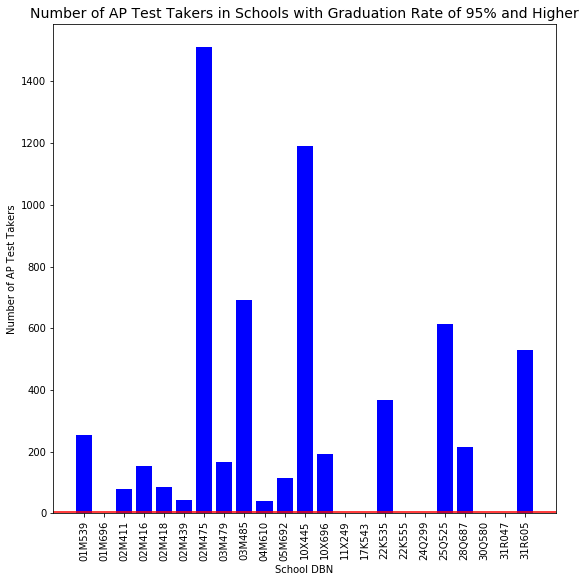

In [5]:
#Plot Schools with a graduation rate of 95% or higher verses the total number of ap test takers
hyp1df = df[df['Total Grads - % of cohort'] >= 95]
plt.figure(figsize=(9,9))
plt.bar(hyp1df['DBN'], hyp1df['AP Test Takers '], color = 'blue')
plt.axhline(y=5, color = 'red')
plt.title("Number of AP Test Takers in Schools with Graduation Rate of 95% and Higher", fontsize = 14)
plt.xlabel('School DBN')
plt.xticks(rotation=90)
plt.ylabel('Number of AP Test Takers')

Conclusion: From that graph, I saw that all the schools had more than five students taking AP tests except for 7 schools that had no data at all.  For the 7 schools that had no information about there AP testing, I do not know if no students took AP tests, or if that school was just not included in the csv file.  Therefore, I can say that with the data I have, my hypothesis it true.

##### Hypothesis 2
I believe that schools where students take an average of 2 or more AP exams, the graduation rate is higher, than schools where students take an average of less than 2 exams. Specifically, I hypothesize that schools who have students averaging 2 or more AP exams have an average graduation rate that is 2% higher than schools who have students averaging less than 2 AP exams.

First, I am going to add a new column to my data frame for the average amount of tests taken per student. Then I looked at how many schools have an average of 2 tests per student or higher, and found that 4 schools fit that criteria and only three of them had graduation rate information.  Then I look at how many schools have an average of less than two tests per student (Note: that rows with NAN values are excluded).  There are 229 Schools that had students who took AP exams but averaged less than two exams per student.  Then, I made a bar graph of the average graduation rate for schools with an average of 2 or more AP tests per students and schools with an average of less than 2 AP tests per student.


In [6]:
#Make a Average Tests per Student Columns 

df['Average Tests per Student'] = df['Total Exams Taken'] / df['AP Test Takers ']

In [7]:
#Find the average graduation rate of school with an average of 2 tests per student
Avg_two_test_grad_rate = df.loc[df['Average Tests per Student'] >= 2, 'Total Grads - % of cohort'].mean()

#Find the average rate of graduation for school with an average of less than 2 tests per student
Avg_grad_rate = df.loc[df['Average Tests per Student'] < 2, 'Total Grads - % of cohort'].mean()

Avg_two_test_grad_rate - Avg_grad_rate

16.868161434977566

Text(0, 0.5, '% of Cohort Graduating')

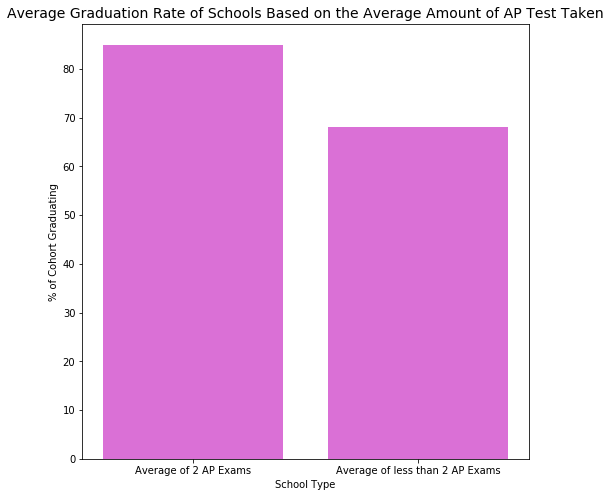

In [8]:
#Graph the Graduation Rates for each
x_type = ['Average of 2 AP Exams', 'Average of less than 2 AP Exams']
grad_rate = [Avg_two_test_grad_rate, Avg_grad_rate]

plt.figure(figsize=(8,8))
plt.bar(x_type, grad_rate, color = 'orchid')
plt.title("Average Graduation Rate of Schools Based on the Average Amount of AP Test Taken", fontsize = 14)
plt.xlabel('School Type')
#plt.xticks(rotation=90)
plt.ylabel('% of Cohort Graduating')

Conclusion: I was correct that schools where students average 2 or more AP Exams on average have a higher graduation rate than schools where students average less than two AP Exams. However, the difference was 16% not 2% so there was a much larger gap between the two groups and my hypothesis was invalid.


##### Hypothesis 3
I believe schools with a higher rate of students scoring 3, 4, and 5 on their exams (these scores are considered “passing”), will have a higher percent of students getting advanced regents diplomas.  I hypothesize that if a school has 50% or higher rate of 3, 4, and 5 scores, then their advanced regents diploma rate will be 30% of the cohort or more.

For this hypothesis, I am only going to be looking at school with a 50% or higher rate of tests with scores 3, 4, or 5.  So I need to add the rate of 3, 4, and 5  tests as a column to my dataframe. I also had to add a column to my dataframe witht the percent of the cohort with advanced regents diplomas. There are 48 schools that had a 50% or higher rate of AP tests with scores 3, 4, or 5 , and I created a bar graph of theses schools and the percent of the cohort with advanced regents diplomas.  


Text(0, 0.5, '% of Cohort with Advanced Regents Diploma')

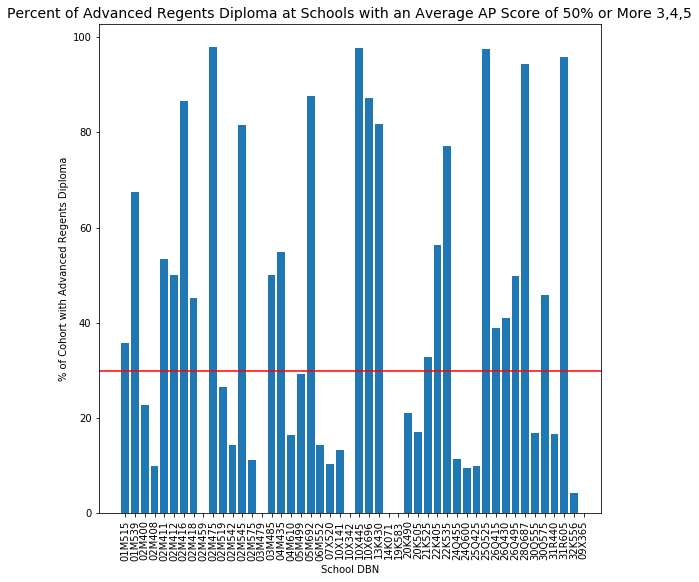

In [9]:
#Create a column for the percentage of exams with 3,4,and 5 scores.
df['Percentage of 3,4,5s'] = (df['Number of Exams with scores 3 4 or 5'] / df['Total Exams Taken']) * 100

#Create a column of % of Cohort with advanced regents
df['% with Advanced'] = (df['Advanced Regents - n'] / df['Total Cohort']) * 100

#Locate all the Schools with 50% or higher rate of exams with 3,4, and 5.
hyp3df = df.loc[df['Percentage of 3,4,5s'] >= 50]

#Graph the Advanced Regents Percent for schools with 50%+
plt.figure(figsize=(9,9))
plt.bar(hyp3df['DBN'],hyp3df['% with Advanced'] )
plt.axhline(y=30, color = 'red')
plt.title("Percent of Advanced Regents Diploma at Schools with an Average AP Score of 50% or More 3,4,5", fontsize = 14)
plt.xlabel('School DBN')
plt.xticks(rotation=90)
plt.ylabel('% of Cohort with Advanced Regents Diploma')

#hyp3df.loc[df['% with Advanced'] >= 30].shape


Conclusion: From my graph I can see that my hypothesis is incorrect.  From my graph I can see that not all the schools with a 50% rate of 3, 4, or 5 score on their AP exams have 30% or more of the 2010 cohort with advanced regents diplomas.  In fact half of the schools have less than 30% of the cohort with advanced regents diplomas.

##### Question 1
Is there a correlation between AP Test taken and graduation rate?


Text(0, 0.5, 'Number of AP Tests Taken')

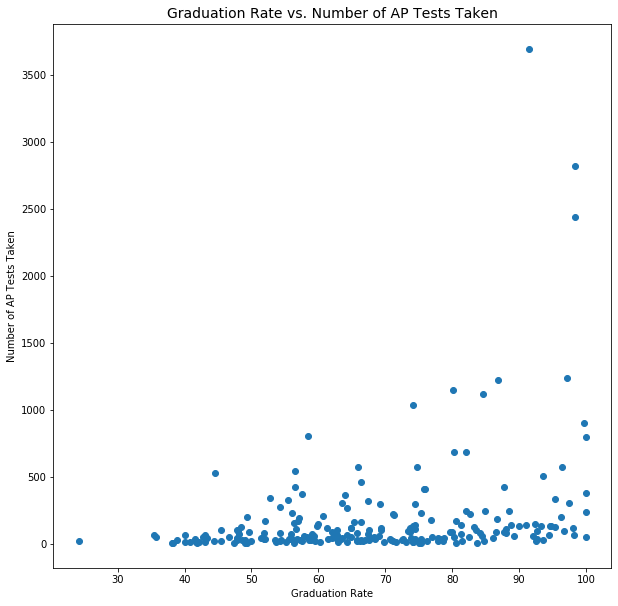

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(df['Total Grads - % of cohort'],df['Total Exams Taken'] )
plt.title("Graduation Rate vs. Number of AP Tests Taken", fontsize = 14)
plt.xlabel('Graduation Rate')
plt.ylabel('Number of AP Tests Taken')

In [11]:
# Calculate the correlation coefficient between 'Total Grads - % of cohort' and 'Total Exams Taken'
df['Total Grads - % of cohort'].corr(df['Total Exams Taken'])

0.3162223637281072


Answer: I made a scatter plot of Graduation Rate vs. Number of AP Tests Taken. From this graph, I observed that there are schools with low number of AP tests and a low graduation rate, and low numbers of AP tests with a high graduation rate.  I then calculated the correlatoin coeficient and found that is was approximately .316.  This means that there is a weak positive correlation between Number of AP tests taken and graduation rate.

##### Question 2
Which borough has the most AP testers? Which Borough has the most tests with scores 3, 4, and 5? Which borough has the highest graduation rate?


In [12]:
#Which borough has the most AP testers?

#Add New Column that gives the Borough of Each School
df['Borough']='NO'
df.loc[df['DBN'].str.contains('M'), 'Borough'] = 'Manhattan'
df.loc[df['DBN'].str.contains('K'), 'Borough'] = 'Brooklyn'
df.loc[df['DBN'].str.contains('X'), 'Borough'] = 'Bronx'
df.loc[df['DBN'].str.contains('Q'), 'Borough'] = 'Queens'
df.loc[df['DBN'].str.contains('R'), 'Borough'] = 'Staten Island'

#Group by borough
group_borough = df.groupby(by=['Borough'])
group_borough.size()

Borough
Bronx            112
Brooklyn         126
Manhattan        103
Queens            62
Staten Island     10
dtype: int64

Text(0, 0.5, 'Number of Students')

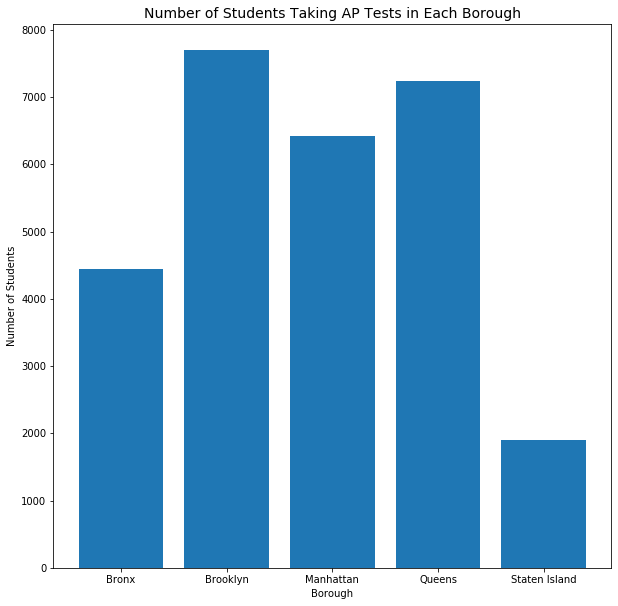

In [13]:
#Find the sum of AP Test Takers for Each Borough
total_ap= group_borough['AP Test Takers '].sum()
total_ap
borough = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
#Brooklyn has the most amount of AP Test Takers
plt.figure(figsize=(10,10))
plt.bar(borough, total_ap)
plt.title("Number of Students Taking AP Tests in Each Borough", fontsize = 14)
plt.xlabel('Borough')
plt.ylabel('Number of Students')



Text(0, 0.5, 'Percent of Tests with Score 3, 4, or 5')

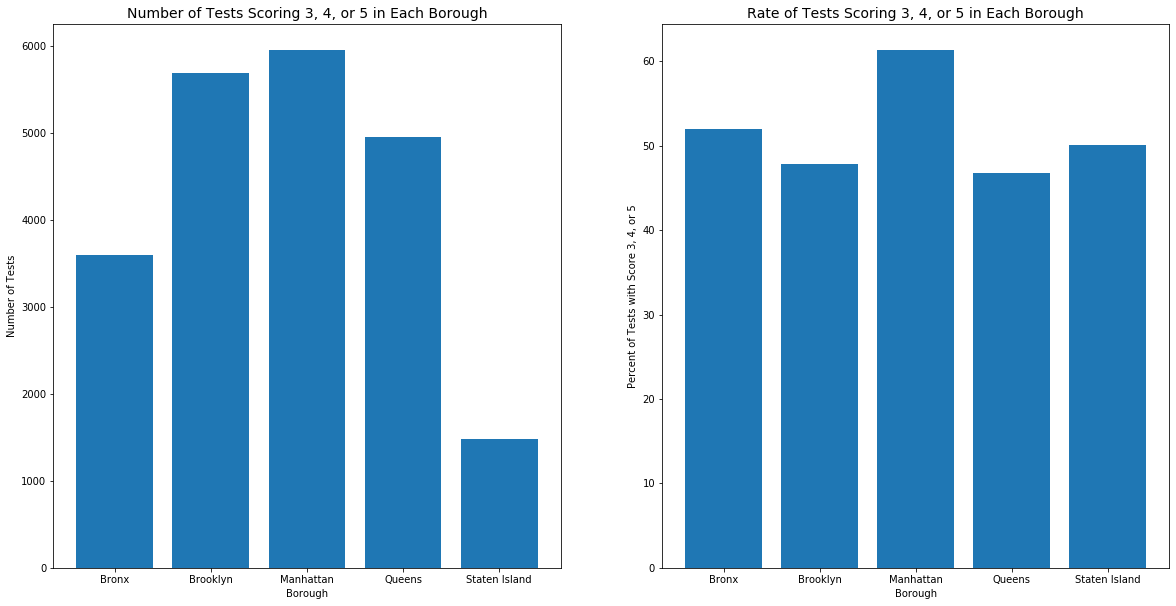

In [14]:
#Find which Borough has the most AP Tests with Scores 3, 4, and 5
total_ap_score= group_borough['Number of Exams with scores 3 4 or 5'].sum()
#Manhattan had the most number of tests with scores 3,4,5
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
ax1.bar(borough, total_ap_score)
ax1.set_title("Number of Tests Scoring 3, 4, or 5 in Each Borough", fontsize = 14)
ax1.set_xlabel('Borough')
ax1.set_ylabel('Number of Tests')


#Let's Normalize this a bit
total_number_tests = group_borough['Total Exams Taken'].sum()
score_rate = total_ap_score.divide(total_number_tests) * 100
#Manhattan has the highest rate of 3,4,5

ax2.bar(borough, score_rate)
ax2.set_title("Rate of Tests Scoring 3, 4, or 5 in Each Borough", fontsize = 14)
ax2.set_xlabel('Borough')
ax2.set_ylabel('Percent of Tests with Score 3, 4, or 5')

Text(0, 0.5, 'Graduation Rate')

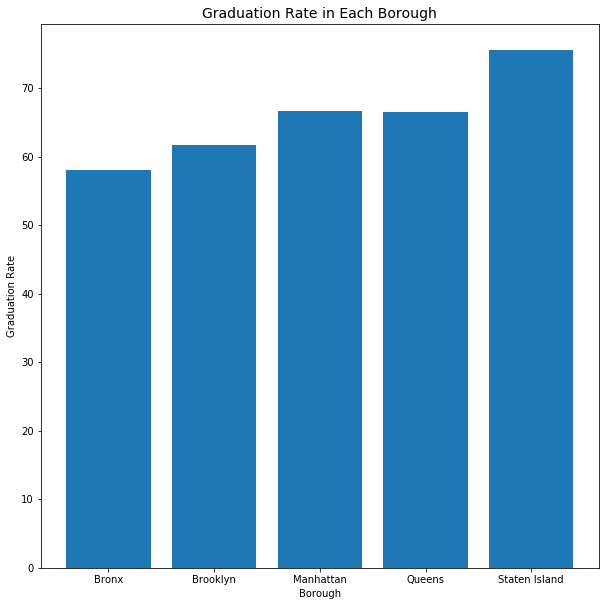

In [15]:
#Which borough has the highest graduation rate
total = group_borough['Total Cohort'].sum()
total_grad = group_borough['Total Grads - n'].sum()
total_grad_rate = total_grad.divide(total) * 100
total_grad_rate
#Manhattan has the highest graduation rate.

plt.figure(figsize=(10,10))
plt.bar(borough, total_grad_rate)
plt.title("Graduation Rate in Each Borough", fontsize = 14)
plt.xlabel('Borough')
plt.ylabel('Graduation Rate')


Answer: Manhattan had the most AP testers.  Manhattan also had the most tests with scores 3, 4, or 5, and the highest rate of scores 3, 4, or 5.  Staten Island had the highest graduation rate


### Conclusion, and What I Learned

To conclude, I was able to use these datasets to test my hypotheses and answer my questions.  It would be interesting to do this with more cohorts than just 2010 but on the website where I retrived my data there was only 2010 AP data.

From this project I learned how to calculate the correlation coefficient using python.  I also learned that I need to make my questions more specific.  For example, instead of writing is there a correlation between tests and graduation rates, I should have said is there a stong positive correlation between tests and graduation rates.  Further, I learned to add horizontal lines on my graphs to make it more clear which schools are above and below a certain graduation rate.  I also remembered to make sure to normalize my data so I can properly answer the question at hand.  I also learned the different methods of joining dataframes (like inner and outer).  Lastly, this project took me significantly less time than the first two which made me realize that my python skills have increased, I have gotten better at working with code I use from other projects and applying it to this project, and my googling skills have also increased.